# Brain Tumor Classification

## Clone the Github Repo to access the Dataset

In [1]:
!git clone https://github.com/Ashish-Arya-CS/Coursera-Content.git

Cloning into 'Coursera-Content'...
Updating files:  26% (883/3287)
Updating files:  27% (888/3287)
Updating files:  28% (921/3287)
Updating files:  29% (954/3287)
Updating files:  30% (987/3287)
Updating files:  31% (1019/3287)
Updating files:  32% (1052/3287)
Updating files:  33% (1085/3287)
Updating files:  34% (1118/3287)
Updating files:  35% (1151/3287)
Updating files:  36% (1184/3287)
Updating files:  37% (1217/3287)
Updating files:  38% (1250/3287)
Updating files:  39% (1282/3287)
Updating files:  40% (1315/3287)
Updating files:  41% (1348/3287)
Updating files:  42% (1381/3287)
Updating files:  43% (1414/3287)
Updating files:  44% (1447/3287)
Updating files:  45% (1480/3287)
Updating files:  46% (1513/3287)
Updating files:  47% (1545/3287)
Updating files:  48% (1578/3287)
Updating files:  49% (1611/3287)
Updating files:  50% (1644/3287)
Updating files:  51% (1677/3287)
Updating files:  52% (1710/3287)
Updating files:  53% (1743/3287)
Updating files:  54% (1775/3287)
Updating file

## Import necessary Libraries 

In [4]:
import os
import random
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator, array_to_img
from tensorflow.keras.applications import EfficientNetB1

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Conv2D,Dropout,GlobalAveragePooling2D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import imutils    


## Creating Directories to store Cropped Images

In [8]:
# Create Directory for Training Data
os.mkdir("Crop_Brain_MRI")
os.mkdir("Crop_Brain_MRI/glioma_tumor")
os.mkdir("Crop_Brain_MRI/meningioma_tumor")
os.mkdir("Crop_Brain_MRI/no_tumor")
os.mkdir("Crop_Brain_MRI/pituitary_tumor")


In [9]:
# Create Directory for Testing Data
os.mkdir("Test_Data")
os.mkdir("Test_Data/glioma_tumor")
os.mkdir("Test_Data/meningioma_tumor")
os.mkdir("Test_Data/no_tumor")
os.mkdir("Test_Data/pituitary_tumor")

## Data Visualization

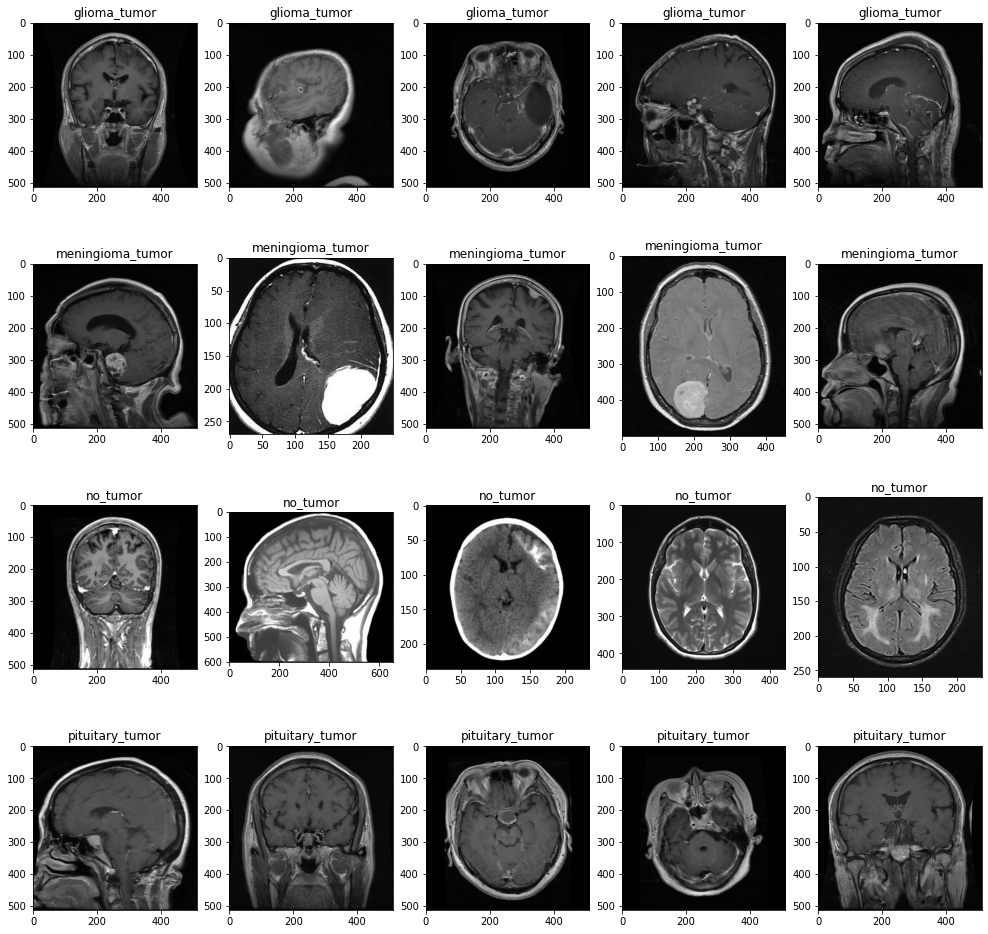

In [10]:
train_dir="Coursera-Content/Brain-MRI/Training/"
test_dir="Coursera-Content/Brain-MRI/Testing/"
classes=os.listdir("Coursera-Content/Brain-MRI/Training")
files_path_dict={}


for c in classes:
  files_path_dict[c]=list(map(lambda x :train_dir+c+'/'+x,os.listdir(train_dir+c)))#usage of lambda as an iterator in diff training folders

plt.figure(figsize=(17,17))
index=0

for c in classes:
  random.shuffle(files_path_dict[c])
  path_list=files_path_dict[c][:6]#accessing first five files of the dictionary

  for i in range(1,6):
    index+=1
    plt.subplot(4,5,index)
    plt.imshow(load_img(path_list[i]))
    plt.title(c)

## Create a Function to Crop Images

In [11]:
def crop_image(image, plot=False):
    
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (5, 5), 0)
    
    img_thresh = cv2.threshold(img_gray, 45, 255, cv2.THRESH_BINARY)[1]
    img_thresh = cv2.erode(img_thresh, None, iterations=2)
    img_thresh = cv2.dilate(img_thresh, None, iterations=2)

    contours = cv2.findContours(img_thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    c = max(contours, key=cv2.contourArea)

    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            

    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Original Image')
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)
        plt.tick_params(axis='both', which='both',top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Cropped Image')
        plt.show()
    
    return new_image


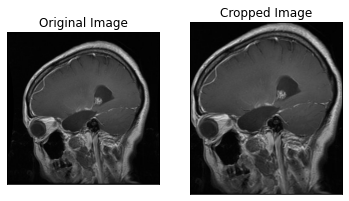

In [13]:
example_img=cv2.imread("Coursera-Content/Brain-MRI/Training/glioma_tumor/gg (101).jpg")
cropped_image=crop_image(example_img,plot=True)

## Saving The Cropped Images 

In [15]:
# Crop the Training Images and Save it to the Directory we previously created
glioma=train_dir+"glioma_tumor"
meningioma=train_dir+"meningioma_tumor"
no_tumor=train_dir+"no_tumor"
pituitary=train_dir+"pituitary_tumor"

#tqdm shows progress bar
j=0
for i in tqdm(os.listdir(glioma)):#here i refers to pictures in glioma training folder
  path=os.path.join(glioma,i)
  img=cv2.imread(path)
  img=crop_image(img)
  if img is not None:
    img=cv2.resize(img,(224,224))
    save_path="Crop_Brain_MRI/glioma_tumor/"+str(j)+".jpg"
    cv2.imwrite(save_path,img)
    j=j+1

j=0
for i in tqdm(os.listdir(meningioma)):#here i refers to pictures in meningioma training folder
  path=os.path.join(meningioma,i)
  img=cv2.imread(path)
  img=crop_image(img)
  if img is not None:
    img=cv2.resize(img,(224,224))
    save_path="Crop_Brain_MRI/meningioma_tumor/"+str(j)+".jpg"
    cv2.imwrite(save_path,img)
    j=j+1

j=0
for i in tqdm(os.listdir(no_tumor)):#here i refers to pictures in no_tumor training folder
  path=os.path.join(no_tumor,i)
  img=cv2.imread(path)
  img=crop_image(img)
  if img is not None:
    img=cv2.resize(img,(224,224))
    save_path="Crop_Brain_MRI/no_tumor/"+str(j)+".jpg"
    cv2.imwrite(save_path,img)
    j=j+1

j=0
for i in tqdm(os.listdir(pituitary)):#here i refers to pictures in pituitary training folder
  path=os.path.join(pituitary,i)
  img=cv2.imread(path)
  img=crop_image(img)
  if img is not None:
    img=cv2.resize(img,(224,224))
    save_path="Crop_Brain_MRI/pituitary_tumor/"+str(j)+".jpg"
    cv2.imwrite(save_path,img)
    j=j+1
  
  

100%|██████████| 901/901 [00:06<00:00, 132.69it/s]


In [18]:
# Crop the Testing Images and Save it to the Directory we previously created
#keep a diff name like test_glioma and not glioma not to create confusion
test_glioma=test_dir+"glioma_tumor"    #this test_dir refers to test dataset present in brain-mri
test_meningioma=test_dir+"meningioma_tumor"
test_no_tumor=test_dir+"no_tumor"
test_pituitary=test_dir+"pituitary_tumor"

j=0
for i in tqdm(os.listdir(test_glioma)):
  path=os.path.join(test_glioma,i)
  img=cv2.imread(path)
  img=crop_image(img)
  if img is not None:
    img=cv2.resize(img,(224,224))
    save_path=("Test_Data/glioma_tumor/"+str(j)+".jpg")
    cv2.imwrite(save_path,img)
    j=j+1
j=0
for i in tqdm(os.listdir(test_meningioma)):
  path=os.path.join(test_meningioma,i)
  img=cv2.imread(path)
  img=crop_image(img)
  if img is not None:
    img=cv2.resize(img,(224,224))
    save_path=("Test_Data/meningioma_tumor/"+str(j)+".jpg")
    cv2.imwrite(save_path,img)
    j=j+1
j=0
for i in tqdm(os.listdir(test_no_tumor)):
  path=os.path.join(test_no_tumor,i)
  img=cv2.imread(path)
  img=crop_image(img)
  if img is not None:
    img=cv2.resize(img,(224,224))
    save_path=("Test_Data/no_tumor/"+str(j)+".jpg")
    cv2.imwrite(save_path,img)
    j=j+1
j=0
for i in tqdm(os.listdir(test_pituitary)):
  path=os.path.join(test_pituitary,i)
  img=cv2.imread(path)
  img=crop_image(img)
  if img is not None:
    img=cv2.resize(img,(224,224))
    save_path=("Test_Data/pituitary_tumor/"+str(j)+".jpg")
    cv2.imwrite(save_path,img)
    j=j+1 




100%|██████████| 5/5 [00:00<00:00, 96.34it/s]


## Perform Data Augmentation and Prepare the Train, Validation and Test Dataset

In [19]:
# Use Image Data Generator to perform this task.
#ImageDataGenerator is used to create dictionary for the task
datagen=ImageDataGenerator(rotation_range=10,height_shift_range=0.3 ,horizontal_flip=True,validation_split=0.2)#20%data for validation rest for training
train_data=datagen.flow_from_directory("Crop_Brain_MRI/",
                                       target_size=(224,224),
                                       batch_size=32,
                                       class_mode="categorical",
                                       subset="training")

valid_data=datagen.flow_from_directory("Crop_Brain_MRI/",
                                       target_size=(224,224),
                                       batch_size=32,
                                       class_mode="categorical",
                                       subset="validation")

test_datagen=ImageDataGenerator()

test_data=datagen.flow_from_directory("Test_Data/",
                                      target_size=(224,224),
                                      class_mode="categorical")


Found 2613 images belonging to 4 classes.
Found 652 images belonging to 4 classes.
Found 20 images belonging to 4 classes.


In [20]:
# View the class dictionary
print(train_data.class_indices)
print(train_data.class_indices)

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}
{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}


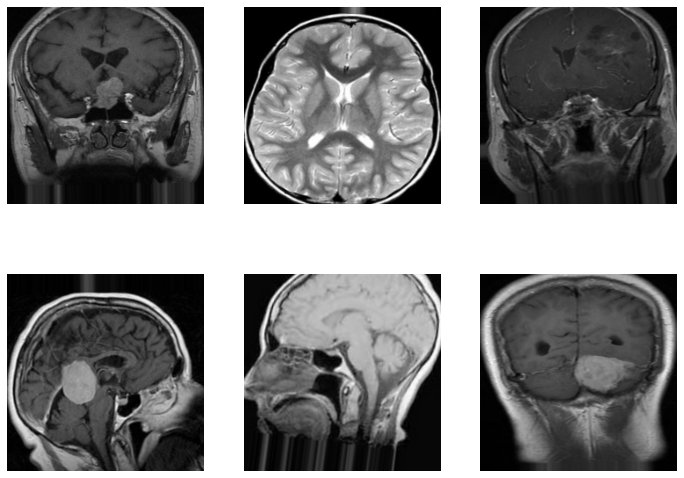

In [21]:
# View the augmented data.
sample_x,sample_y=next(train_data)
plt.figure(figsize=(12,9))
for i in range(6):
  plt.subplot(2,3,i+1) #way to display on output screen using subplot
  sample=array_to_img(sample_x[i])
  plt.axis("off")
  plt.grid(False)
  plt.imshow(sample)
plt.show()
  

## Build and Compile the Model 

In [22]:
# Build the Model
#I am using efficient net version b1
effnet=EfficientNetB1(weights="imagenet",include_top=False,input_shape=(224,224,3))
#it was trained on imagenet

model=effnet.output
model=GlobalAveragePooling2D()(model)
model=Dropout(0.5)(model)#to avoid overfitting
model=Dense(4,activation="softmax")(model)
model=Model(inputs=effnet.input,outputs=model)

model.summary()


27025408/27018416 [==============================] - 47s 2us/step
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
_____________________

In [23]:
#compiling
model.compile(optimizer=Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
#checkpoint to select best model
checkpoint=ModelCheckpoint("model.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
#stop early if accuracy decreases and observing period is 5 epochs
earlystop=EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

## Model Training and Model Evaluation

In [24]:
# Train the model
history=model.fit(train_data,epochs=7,validation_data=valid_data,verbose=1,callbacks=[checkpoint,earlystop])

Epoch 1/7
82/82 [==============================] - ETA: 0s - loss: 0.8909 - accuracy: 0.6475 
Epoch 00001: val_accuracy improved from -inf to 0.61503, saving model to model.h5
82/82 [==============================] - 1555s 19s/step - loss: 0.8909 - accuracy: 0.6475 - val_loss: 0.8720 - val_accuracy: 0.6150
Epoch 2/7
82/82 [==============================] - ETA: 0s - loss: 0.3952 - accuracy: 0.8595 
Epoch 00002: val_accuracy improved from 0.61503 to 0.78221, saving model to model.h5
82/82 [==============================] - 1470s 18s/step - loss: 0.3952 - accuracy: 0.8595 - val_loss: 0.5430 - val_accuracy: 0.7822
Epoch 3/7
82/82 [==============================] - ETA: 0s - loss: 0.2706 - accuracy: 0.9108 
Epoch 00003: val_accuracy improved from 0.78221 to 0.84969, saving model to model.h5
82/82 [==============================] - 1231s 15s/step - loss: 0.2706 - accuracy: 0.9108 - val_loss: 0.3994 - val_accuracy: 0.8497
Epoch 4/7
82/82 [==============================] - ETA: 0s - loss: 0.1

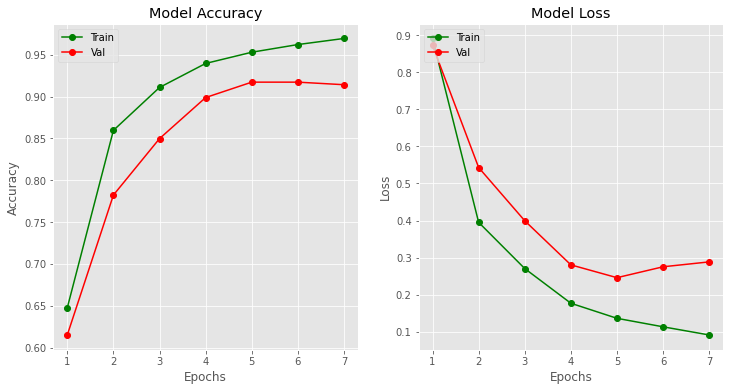

In [25]:
# Plot the training curves
#num - 1 for converting from MATLAB to python indexing
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
epochs=range(1,8)
plt.subplot(1,2,1)
plt.plot(epochs,history.history["accuracy"],"-go")
plt.plot(epochs,history.history["val_accuracy"],"-ro")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","Val"],loc="upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history.history["loss"],"-go")
plt.plot(epochs,history.history["val_loss"],"-ro")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","Val"],loc="upper left")
plt.show()

In [26]:
# Evaluate the model on Test Set
model.evaluate(test_data)

1/1 [==============================] - 0s 2ms/step - loss: 0.1273 - accuracy: 0.9500


[0.12733094394207, 0.949999988079071]

## Obtaining Predictions on Test Images

meningioma_tumor


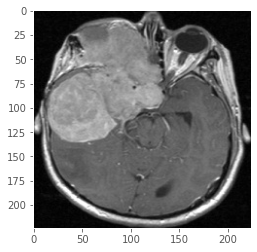

In [28]:
# Obtain Predictions on Test Images
class_dict={0:"glioma_tumor",1:"meningioma_tumor",2:"no_tumor",3:"pituitary_tumor"}

test_img1=cv2.imread("Test_Data/meningioma_tumor/3.jpg")
plt.imshow(test_img1)
plt.grid(False)
test_img1=np.expand_dims(test_img1,axis=0)
pred=model.predict(test_img1)
pred=np.argmax(pred)
pred_class=class_dict[pred]
print(pred_class)